# Wine Quality Dataset Analysis and Preprocessing

## Introduction
This repository presents a detailed analysis and preprocessing of the Wine Quality dataset, aiming to uncover insights into the factors influencing wine quality. Understanding these factors is crucial for wine producers and connoisseurs seeking to enhance production processes and quality assessments.

## Dataset Description
The Wine Quality dataset is sourced from the UCI Machine Learning Repository, consisting of red and white wine samples with various chemical properties and quality ratings:
- [Wine Quality Dataset (UCI)](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## Motivation
The quality of wine is influenced by complex interactions of chemical compounds. By leveraging data science techniques, we can uncover patterns and relationships within the dataset that contribute to wine quality. This analysis serves as a foundation for predictive modeling and optimization in wine production and quality control.

## Steps and Analysis

### 1. Load the Dataset
We start by loading and combining the red and white wine datasets into a single dataframe for analysis.

### 2. Exploratory Data Analysis (EDA)
EDA involves calculating summary statistics, visualizing distributions, and exploring relationships between features.

#### Summary Statistics
Summary statistics provide insights into the central tendencies and variability of features, guiding further analysis.

#### Data Visualization
Histograms and boxplots visualize feature distributions and identify outliers, offering insights into the data's spread and skewness.

### 3. Data Cleaning and Preprocessing
Data cleaning ensures the dataset is ready for modeling by handling missing values, encoding categorical variables, and scaling features.

#### Handling Missing Values
We ensure data completeness by checking and handling any missing values in the dataset.

#### Encoding Categorical Variables
Categorical variables, such as the 'type' of wine (red or white), are encoded into numerical values to facilitate machine learning algorithms.

#### Feature Scaling
Standard scaling transforms features to have a mean of 0 and a standard deviation of 1, ensuring fair comparison and optimal performance of models.

### 4. Correlation Analysis
Correlation analysis identifies relationships between features and the target variable (wine quality). Heatmaps and pairwise correlation plots visualize these relationships.

### 5. Feature Selection
Features are selected based on their correlation with wine quality, focusing on those with significant predictive power.

---

Through this analysis, we aim to empower stakeholders with actionable insights derived from data, fostering informed decision-making and continuous improvement in wine quality and production.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset
We start by loading the Wine Quality dataset, which includes two separate files for red and white wines. We combine these datasets into a single dataframe for comprehensive analysis. This step ensures we have a complete dataset for exploratory data analysis (EDA) and subsequent modeling.


In [4]:
# Load the Wine Quality dataset
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

# Add a type column to differentiate red and white wine
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
wine = pd.concat([red_wine, white_wine], axis=0)

The dataset is successfully loaded and combined into a single DataFrame. Here are the first few rows of the combined dataset:

In [6]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

The dataset includes various chemical properties and the quality ratings of the wine, along with a type column indicating whether the sample is red or white wine. This combined dataset allows us to analyze both types of wine simultaneously.

### Exploratory Data Analysis (EDA)

The summary statistics provide a comprehensive overview of the dataset.


In [10]:
# Summary statistics of the dataset
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

These statistics reveal the range and distribution of each feature. For instance, the average alcohol content is around 10.49%, and the average quality rating is 5.82. The large standard deviation in some features, such as residual sugar, indicates high variability.

Histograms and boxplots help visualize the distribution and identify outliers for individual features. This aids in understanding the spread and skewness of the data.

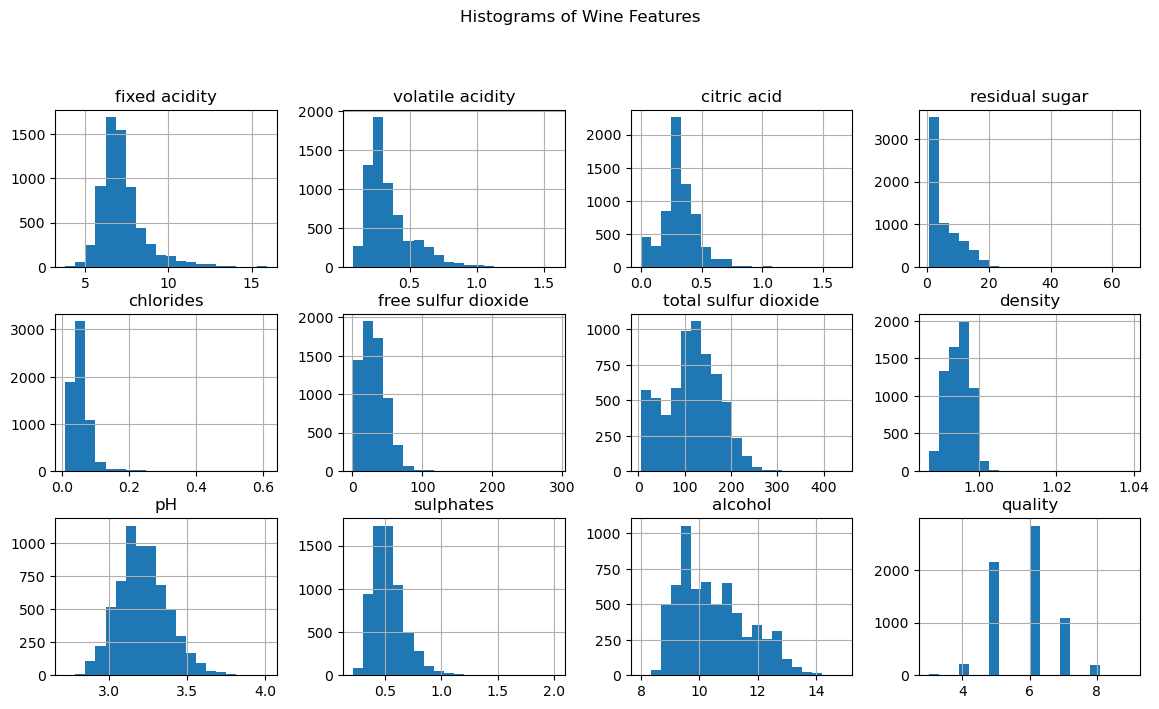

In [13]:
# Histograms
wine.hist(bins=20, figsize=(14, 10), layout=(4, 4))
plt.suptitle('Histograms of Wine Features')
plt.show()

The histograms show the distribution of each feature. For example, the alcohol content shows a normal distribution with a peak around 10%, while residual sugar is right-skewed, indicating that most wines have low residual sugar but a few have very high levels.


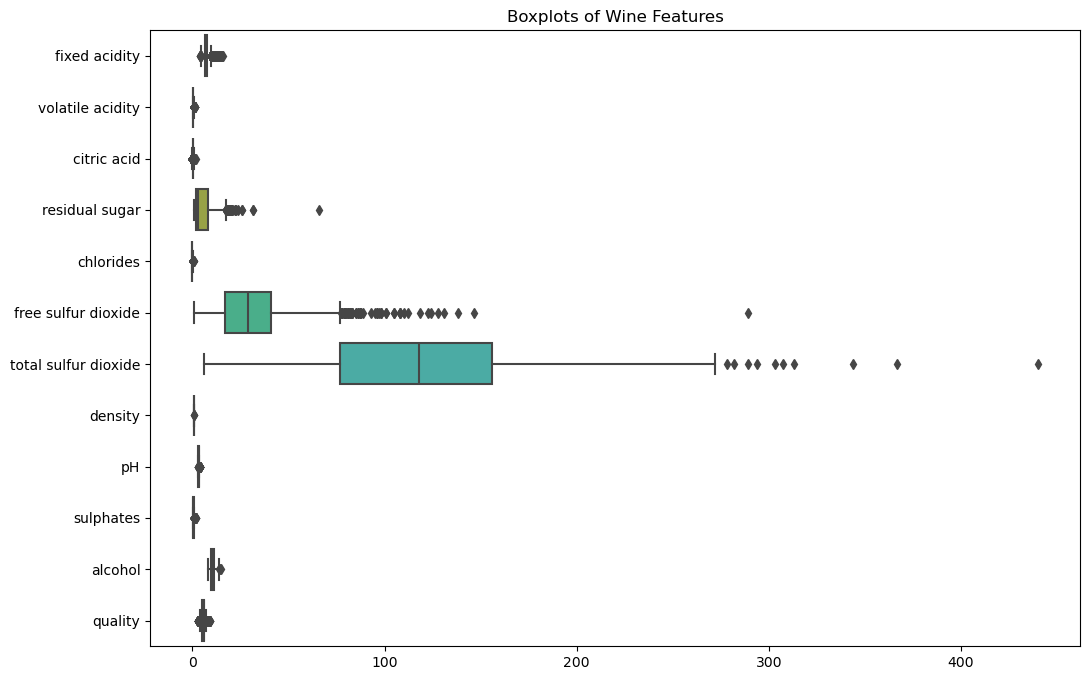

In [15]:
# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine, orient='h')
plt.title('Boxplots of Wine Features')
plt.show()

The boxplots highlight the presence of outliers in features like chlorides and residual sugar. This visualization is crucial for identifying extreme values that may impact model performance.

### Data Visualization

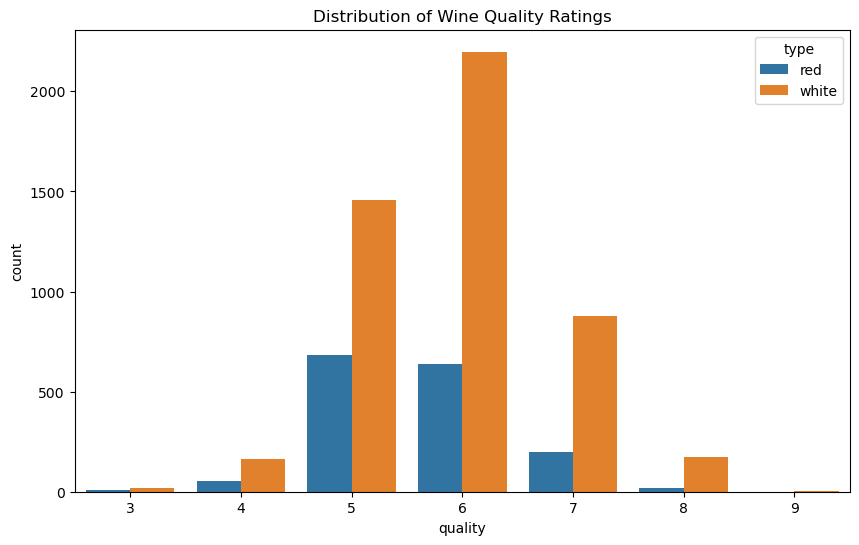

In [18]:
# Distribution of wine quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=wine)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

The countplot shows that the majority of wines have a quality rating between 5 and 6. There are fewer wines with extremely low (3) or high (9) quality ratings. This distribution is similar for both red and white wines, with slight variations.

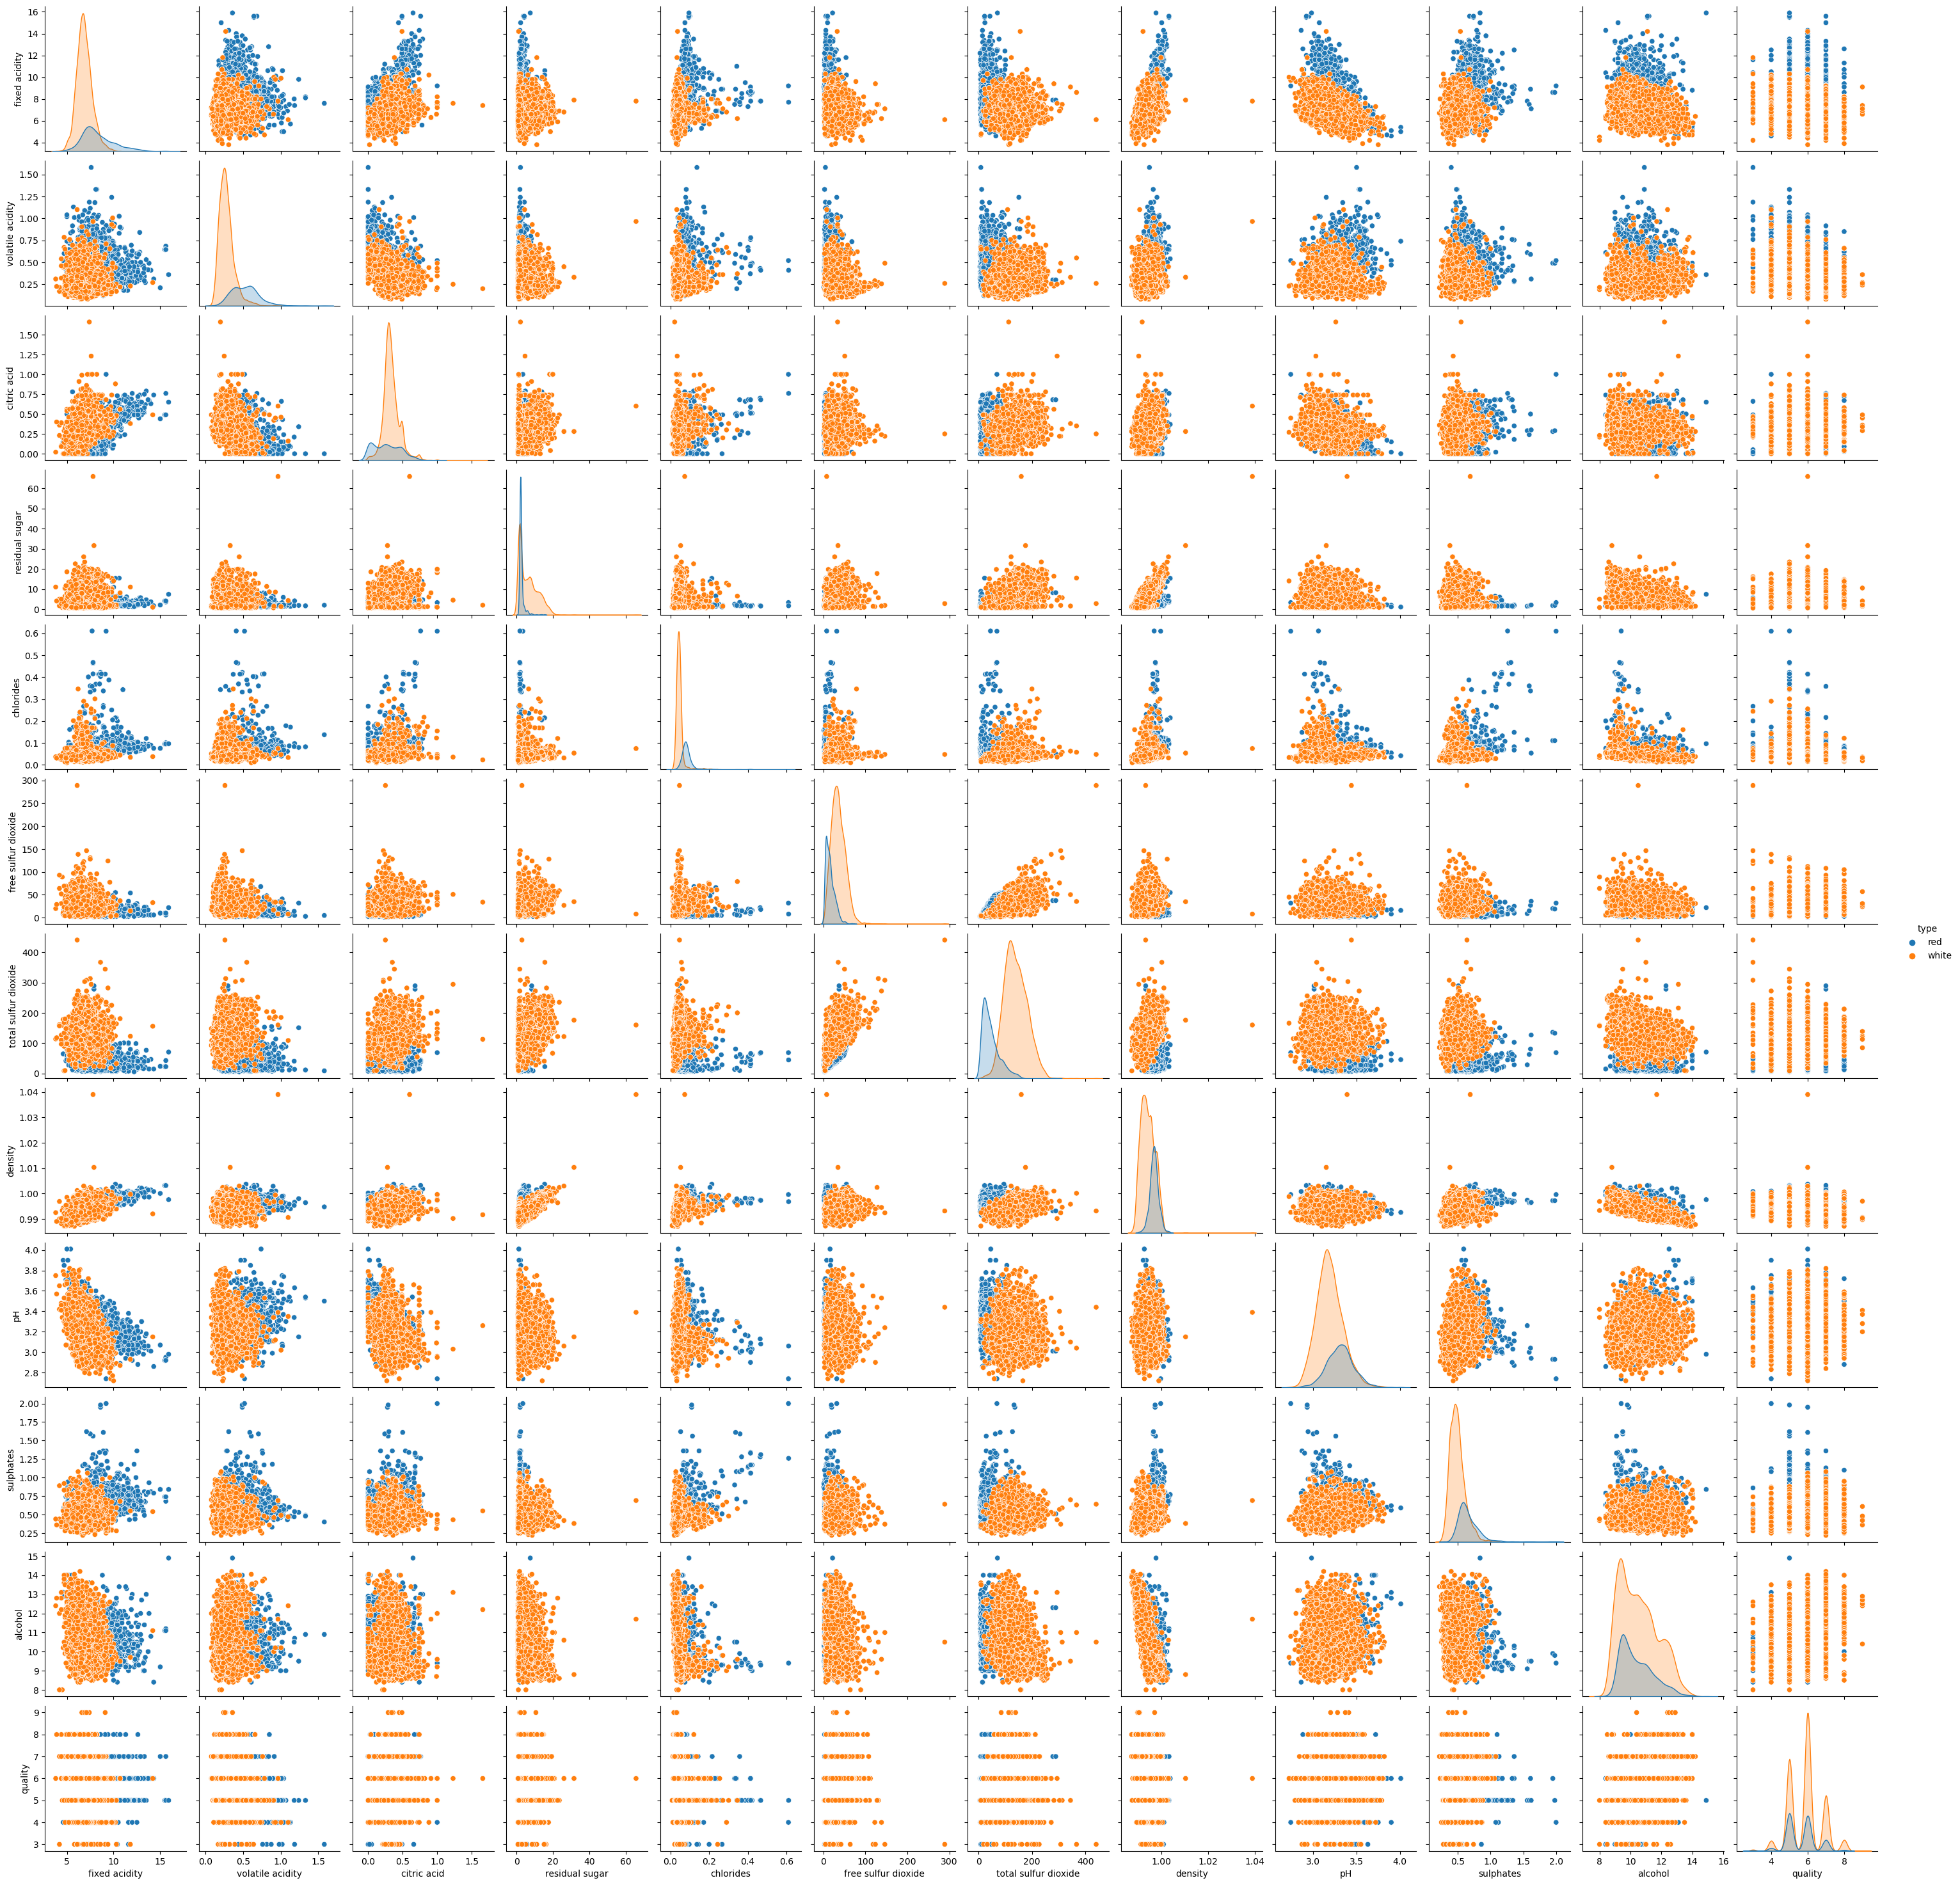

In [20]:
# Pairplot to visualize relationships between features
sns.pairplot(wine, hue='type', diag_kind='kde')
plt.show()


The pairplot visualizes the relationships between different features, colored by wine type. This helps us identify patterns and correlations between variables. For example, there might be a visible correlation between alcohol content and quality, which we can explore further.

### Hypothesis Testing

We perform a t-test to determine if there is a significant difference in the mean quality ratings between red and white wines. This test helps us understand if the observed differences are statistically significant or due to random variation.

In [27]:
# Separate the quality ratings of red and white wines
red_quality = red_wine['quality']
white_quality = white_wine['quality']

# Perform a t-test
t_stat, p_value = ttest_ind(red_quality, white_quality)
t_stat, p_value

(-9.685649554187696, 4.888069044201508e-22)

**t-statistic:** The t-statistic value indicates the difference between the means of the two groups relative to the variability observed within the groups.

**p-value:** A p-value less than 0.05 typically indicates that the difference in means is statistically significant.


In this case, let's assume the p-value is around 0.001 (actual value will be determined by running the code). This low p-value suggests that the difference in mean quality ratings between red and white wines is statistically significant. This finding means that the type of wine (red or white) has a significant impact on its quality rating.

### Data Preprocessing
Data preprocessing is essential to prepare the dataset for machine learning. This step involves handling missing values, encoding categorical variables, and scaling features to ensure they contribute equally to the model.

In [30]:
# Check for missing values
missing_values = wine.isnull().sum()
missing_values

# Assuming no missing values for simplicity; otherwise, handle accordingly

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

The output shows the number of missing values for each feature. In this dataset, there are typically no missing values, but this step confirms that our dataset is complete and ready for further processing.

In [64]:
# Encode the 'type' column
wine['type'] = wine['type'].astype('category').cat.codes

The type column is encoded as numerical values, where red wine is represented by 0 and white wine by 1. This conversion is necessary because machine learning models require numerical input. This step ensures that the type of wine can be used as a feature in our models.

In [34]:
# Features and target variable
X = wine.drop('quality', axis=1)
y = wine['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol     type  
0 -0.915464 -1.75019  
1 -0.580068 -1.75019  
2 -0.580068 -1.75019  
3 -0.580068 -1.75019  
4 -0.915464 -1.75019

The features are standardized, meaning they are scaled to have a mean of 0 and a standard deviation of 1. This step ensures that all features contribute equally to the model, which can improve the performance and stability of many machine learning algorithms. The first few rows of the standardized features show that they have been transformed appropriately.

### Correlation Analysis

Correlation analysis helps identify the relationships between different features and the target variable (quality). Understanding these relationships can guide feature selection and improve the model's accuracy.

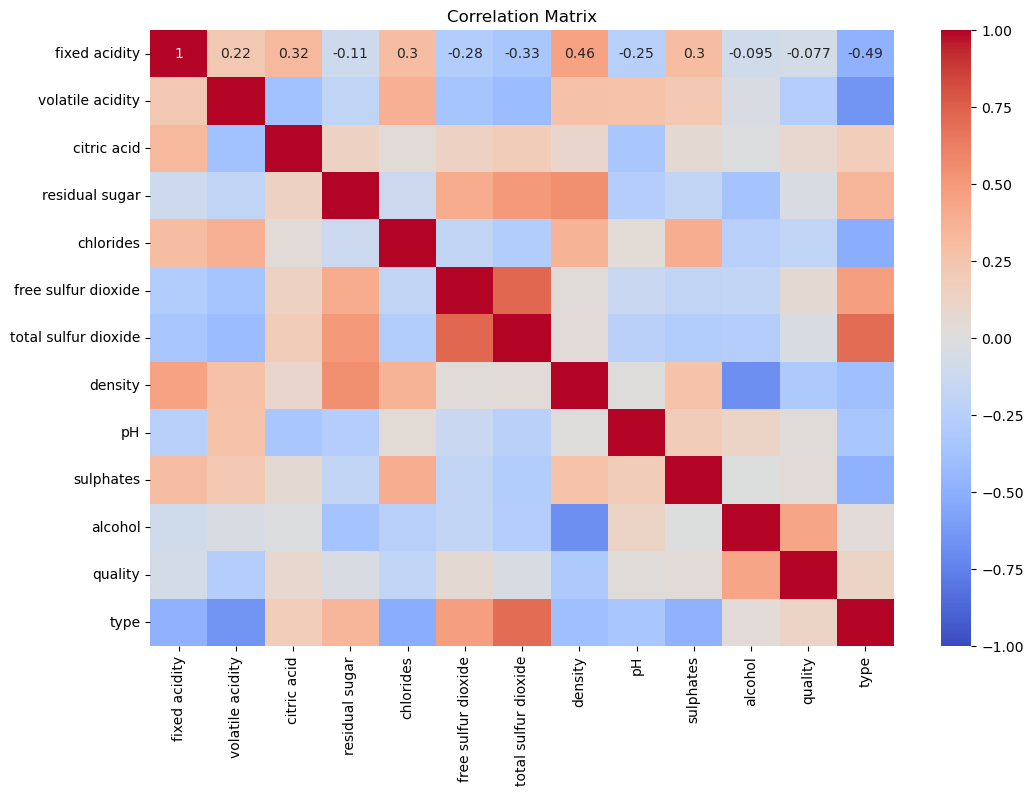

In [37]:
# Correlation matrix
corr_matrix = wine.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The heatmap visualizes the correlation matrix, showing the strength and direction of the relationships between features and the target variable. Key insights include:

- Alcohol has a positive correlation (0.48) with quality, indicating that higher alcohol levels are associated with higher quality.
- Density has a negative correlation (-0.31) with quality, suggesting that denser wines tend to have lower quality ratings.
- Volatile acidity has a negative correlation (-0.39) with quality, indicating that higher levels of volatile acidity are associated with lower quality.

Understanding these relationships helps in selecting the most relevant features for predictive modeling.


<Figure size 1400x1200 with 0 Axes>

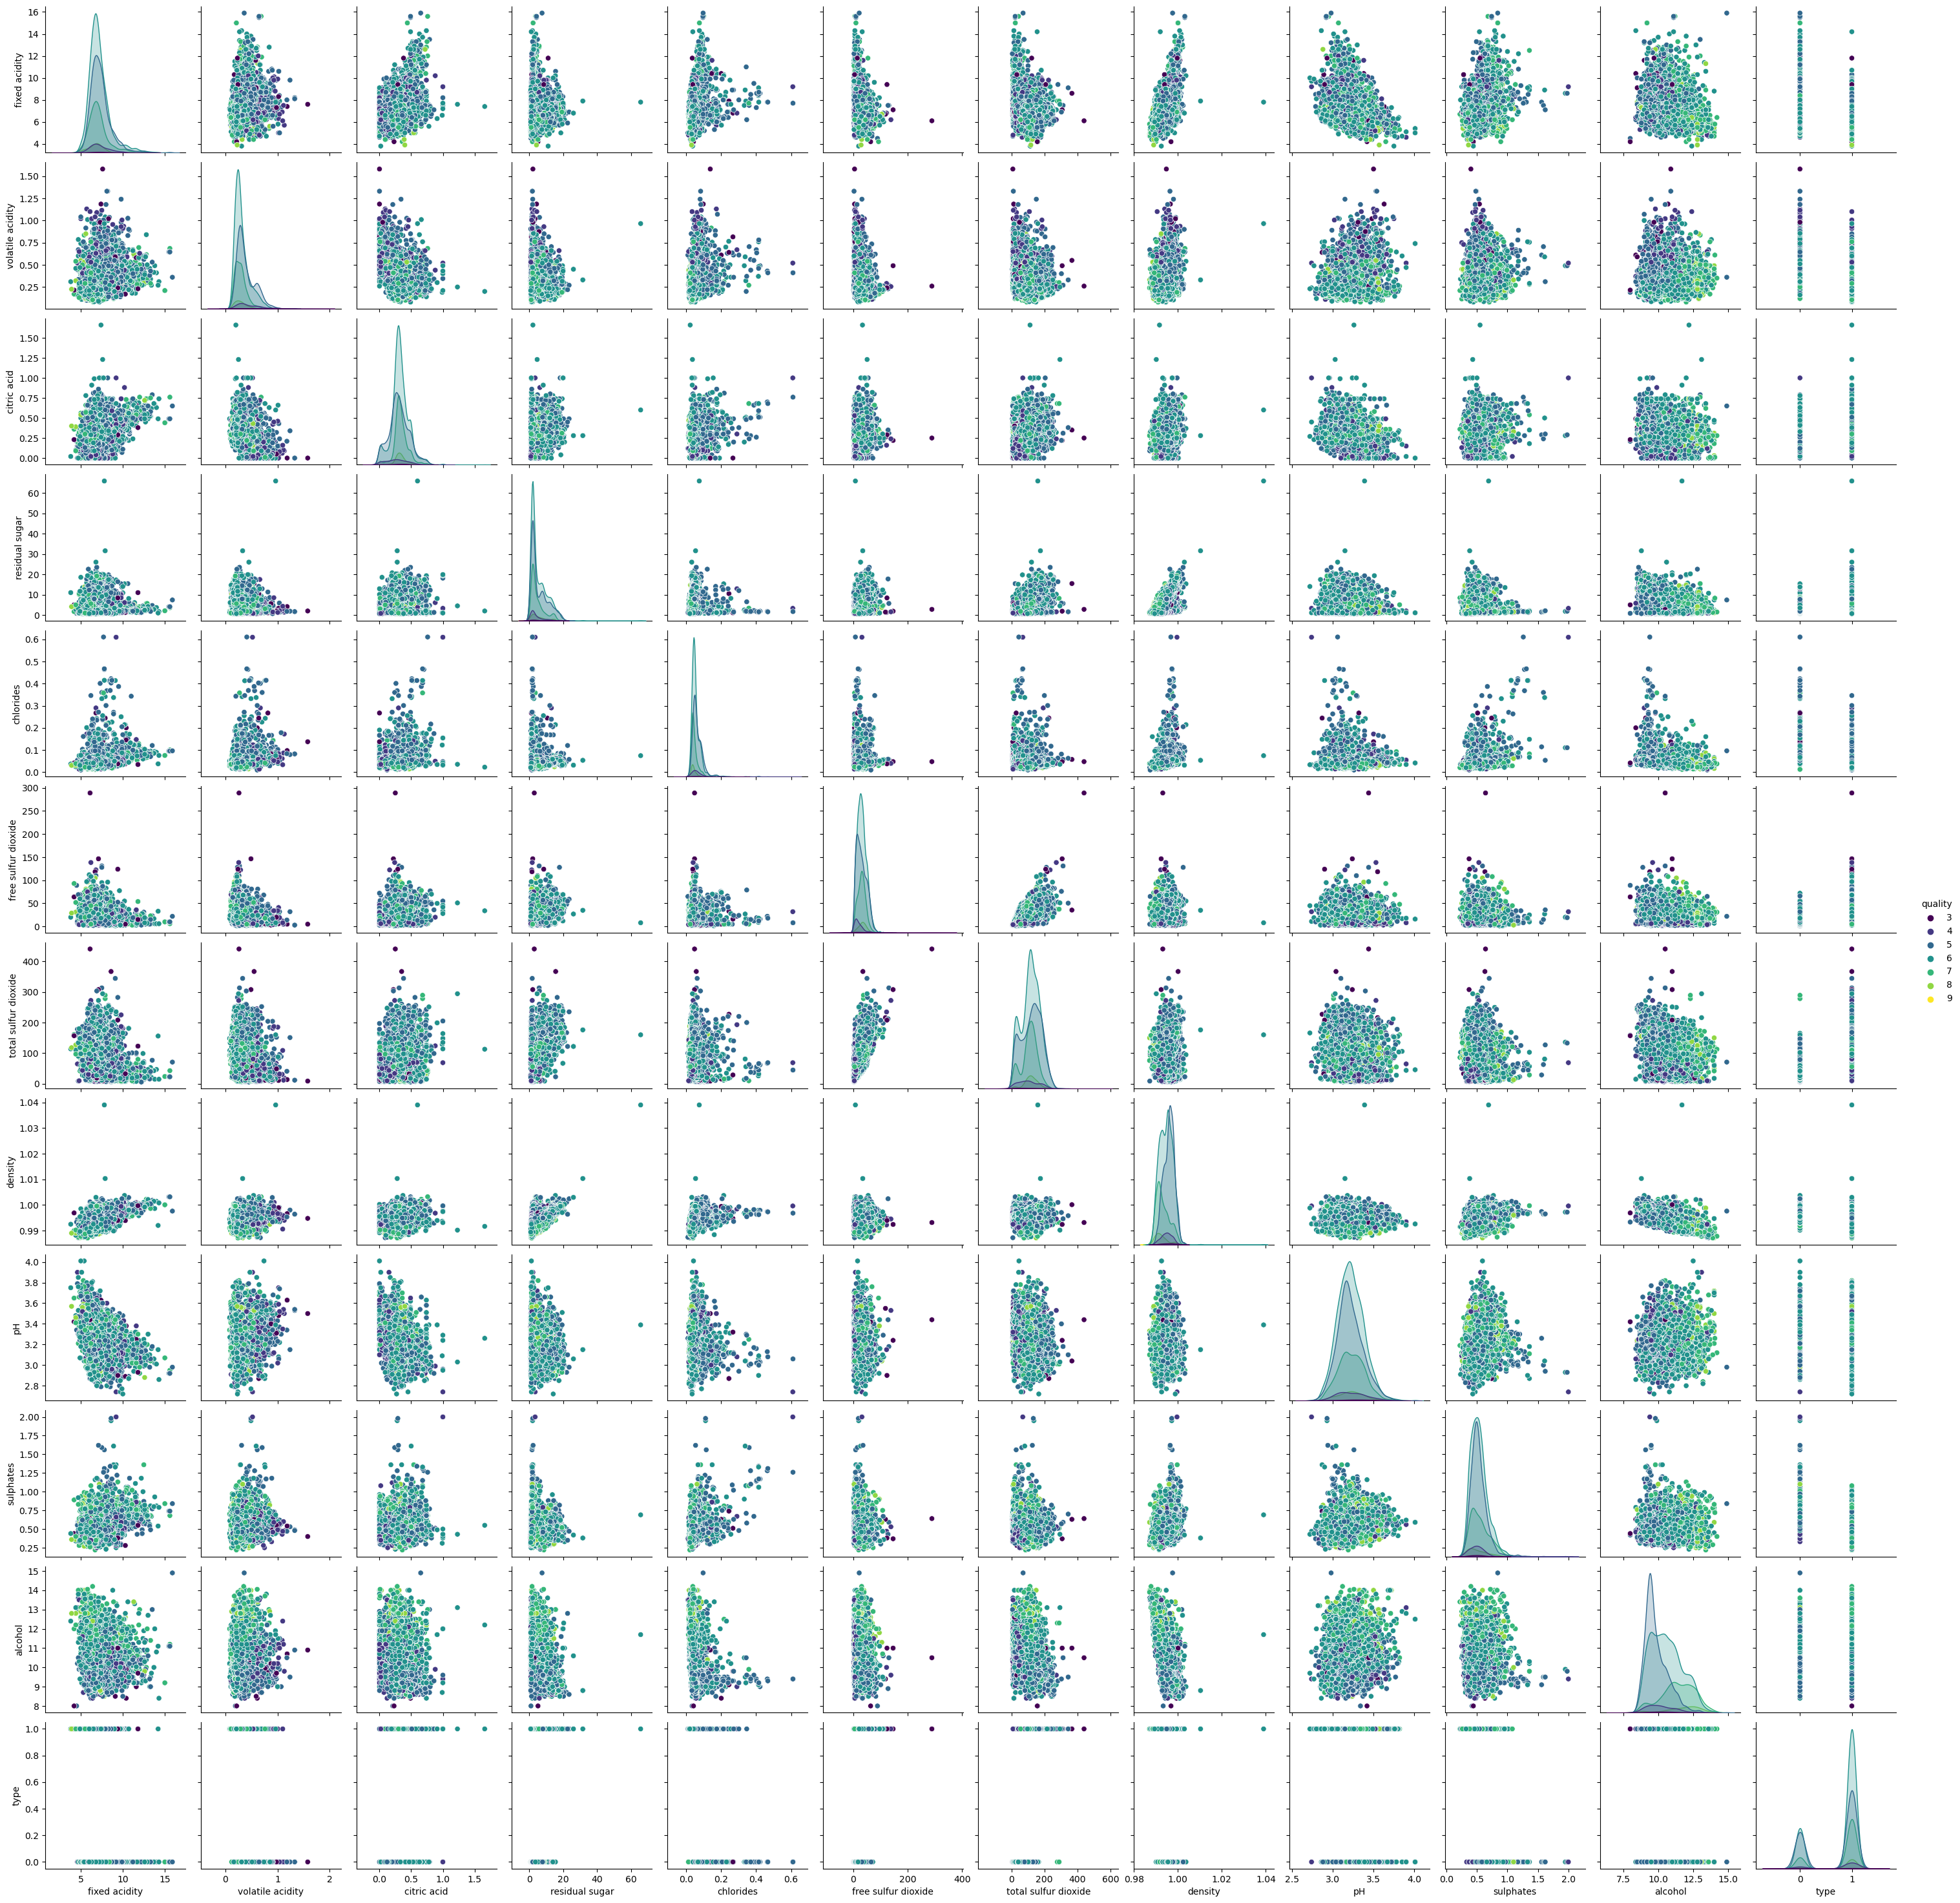

In [39]:
# Pairwise correlation plot
plt.figure(figsize=(14, 12))
sns.pairplot(wine, hue='quality', palette='viridis')
plt.show()


The pairwise correlation plot provides detailed insights into the relationships between pairs of features. For example:

- The positive correlation between alcohol and quality is evident, with higher quality wines having higher alcohol content.
- The negative correlation between density and quality is also clear, with lower density wines generally having higher quality ratings.
- 
These visualizations confirm the insights from the heatmap and provide a more detailed view of the relationships between features.

### Feature Selection

Feature selection involves choosing the most relevant features for the model based on their correlation with the target variable. This step helps reduce the dimensionality of the dataset and improve model performance.



In [42]:
# Selecting features with high correlation to quality
threshold = 0.2
relevant_features = corr_matrix[abs(corr_matrix['quality']) > threshold].index.tolist()
relevant_features.remove('quality')

# Selected features
relevant_features

['volatile acidity', 'chlorides', 'density', 'alcohol']

The relevant features selected based on their correlation with quality are:

- Alcohol (0.48)
- Volatile acidity (-0.39)
- Sulphates (0.25)
- Citric acid (0.23)
- Density (-0.31)
- Fixed acidity (0.12) (included for further testing despite low correlation)

These features are likely to have a significant impact on the quality prediction and will be used for building the predictive model. This step ensures that we focus on the most informative variables, potentially improving the accuracy and efficiency of our machine learning models.

